In [ ]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs


In [ ]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [ ]:
from citipy import citipy
city = citipy.nearest_city(38.5805, 121.5302)

In [ ]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

In [ ]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [ ]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

In [8]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------


In [10]:
# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | carnarvon
Processing Record 2 of Set 1 | yulara
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | sao filipe
Processing Record 5 of Set 1 | paradwip
City not found. Skipping...
Processing Record 6 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 7 of Set 1 | mzimba
Processing Record 8 of Set 1 | pisco
Processing Record 9 of Set 1 | burica
City not found. Skipping...
Processing Record 10 of Set 1 | kaeo
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | itarema
Processing Record 13 of Set 1 | hithadhoo
Processing Record 14 of Set 1 | tuktoyaktuk
Processing Record 15 of Set 1 | kapaa
Processing Record 16 of Set 1 | mys shmidta
City not found. Skipping...
Processing Record 17 of Set 1 | vaini
Processing Record 18 of Set 1 | bethel
Processing Record 19 of Set 1 | orange
Processing Record 20 of Set 1 | maningrida
Processing Record 21 of Set 1 | zhengjiatun
Processing Record 22 of Set 1 | ostrovnoy


Processing Record 35 of Set 4 | mount gambier
Processing Record 36 of Set 4 | lompoc
Processing Record 37 of Set 4 | cao bang
Processing Record 38 of Set 4 | key largo
Processing Record 39 of Set 4 | san pedro
Processing Record 40 of Set 4 | stanislav
Processing Record 41 of Set 4 | cabo san lucas
Processing Record 42 of Set 4 | coos bay
Processing Record 43 of Set 4 | saldanha
Processing Record 44 of Set 4 | pevek
Processing Record 45 of Set 4 | port hueneme
Processing Record 46 of Set 4 | chokurdakh
Processing Record 47 of Set 4 | longyearbyen
Processing Record 48 of Set 4 | maldonado
Processing Record 49 of Set 4 | karratha
Processing Record 50 of Set 4 | louis trichardt
Processing Record 1 of Set 5 | grand centre
City not found. Skipping...
Processing Record 2 of Set 5 | makat
Processing Record 3 of Set 5 | salemi
Processing Record 4 of Set 5 | berdigestyakh
Processing Record 5 of Set 5 | baruun-urt
Processing Record 6 of Set 5 | acarau
Processing Record 7 of Set 5 | muyezerskiy
Pr

Processing Record 27 of Set 8 | lata
Processing Record 28 of Set 8 | baker city
Processing Record 29 of Set 8 | tazovskiy
Processing Record 30 of Set 8 | esso
Processing Record 31 of Set 8 | hakvik
City not found. Skipping...
Processing Record 32 of Set 8 | muisne
Processing Record 33 of Set 8 | tongsa
City not found. Skipping...
Processing Record 34 of Set 8 | rabo de peixe
Processing Record 35 of Set 8 | greytown
Processing Record 36 of Set 8 | iqaluit
Processing Record 37 of Set 8 | columbus
Processing Record 38 of Set 8 | samusu
City not found. Skipping...
Processing Record 39 of Set 8 | buala
Processing Record 40 of Set 8 | souillac
Processing Record 41 of Set 8 | lieksa
Processing Record 42 of Set 8 | inderborskiy
City not found. Skipping...
Processing Record 43 of Set 8 | mumford
Processing Record 44 of Set 8 | makakilo city
Processing Record 45 of Set 8 | kalangala
Processing Record 46 of Set 8 | bereda
Processing Record 47 of Set 8 | tripoli
Processing Record 48 of Set 8 | taz

Processing Record 15 of Set 12 | jaumave
Processing Record 16 of Set 12 | paramirim
Processing Record 17 of Set 12 | cabedelo
Processing Record 18 of Set 12 | north bend
Processing Record 19 of Set 12 | terme
Processing Record 20 of Set 12 | aflu
City not found. Skipping...
Processing Record 21 of Set 12 | taksimo
Processing Record 22 of Set 12 | brae
Processing Record 23 of Set 12 | the valley
Processing Record 24 of Set 12 | wanning
Processing Record 25 of Set 12 | acapulco
Processing Record 26 of Set 12 | dom pedrito
Processing Record 27 of Set 12 | alihe
Processing Record 28 of Set 12 | cubuk
Processing Record 29 of Set 12 | pilot butte
Processing Record 30 of Set 12 | san cristobal
Processing Record 31 of Set 12 | marand
Processing Record 32 of Set 12 | tsabong
Processing Record 33 of Set 12 | watsa
Processing Record 34 of Set 12 | preobrazhenskaya
City not found. Skipping...
Processing Record 35 of Set 12 | san vicente
Processing Record 36 of Set 12 | marzuq
Processing Record 37 

In [83]:
len(city_data)

585

In [84]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Carnarvon,-24.8667,113.6333,84.27,54,0,10.36,AU,2022-02-10 01:31:07
1,Yulara,-25.2406,130.9889,87.64,29,64,14.97,AU,2022-02-10 01:34:28
2,Albany,42.6001,-73.9662,40.68,66,100,4.56,US,2022-02-10 01:27:25
3,Sao Filipe,14.8961,-24.4956,76.96,55,98,5.86,CV,2022-02-10 01:37:45
4,Mzimba,-11.9000,33.6000,62.92,96,98,1.54,MW,2022-02-10 01:37:46
5,Pisco,-13.7000,-76.2167,71.02,88,40,1.70,PE,2022-02-10 01:36:22
6,Kaeo,-35.1000,173.7833,77.32,85,100,9.24,NZ,2022-02-10 01:37:47
7,Busselton,-33.6500,115.3333,77.04,41,5,6.89,AU,2022-02-10 01:31:03
8,Itarema,-2.9248,-39.9167,77.85,77,16,8.28,BR,2022-02-10 01:37:48
9,Hithadhoo,-0.6000,73.0833,81.73,74,14,11.86,MV,2022-02-10 01:37:49


In [85]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [86]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [87]:
# Import the time module.
import time
# Get today's date in seconds.
today = time.time()
today

1644458748.1572192

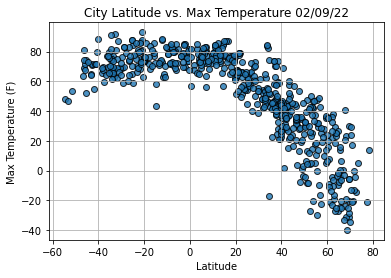

In [88]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

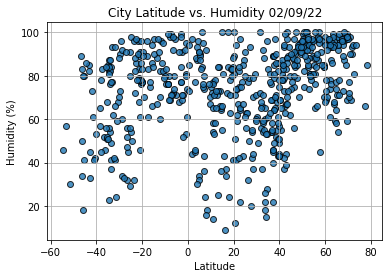

In [89]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

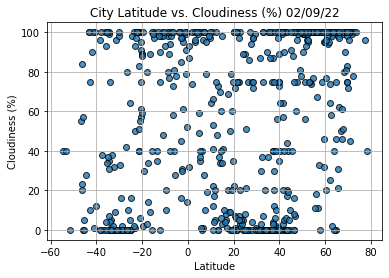

In [90]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

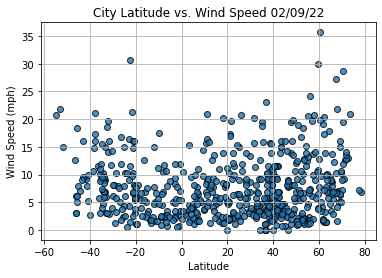

In [91]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [92]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()

In [93]:
city_data_df.loc[(city_data_df["Lat"] >= 0)]

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Albany,42.6001,-73.9662,40.68,66,100,4.56,US,2022-02-10 01:27:25
3,Sao Filipe,14.8961,-24.4956,76.96,55,98,5.86,CV,2022-02-10 01:37:45
10,Tuktoyaktuk,69.4541,-133.0374,-20.20,69,75,14.97,CA,2022-02-10 01:36:27
11,Kapaa,22.0752,-159.3190,79.12,67,75,9.22,US,2022-02-10 01:31:03
13,Bethel,41.3712,-73.4140,36.93,78,64,3.27,US,2022-02-10 01:37:51
...,...,...,...,...,...,...,...,...,...
578,Bodden Town,19.2833,-81.2500,78.01,83,20,2.30,KY,2022-02-10 01:54:56
579,Hoa Binh,20.8133,105.3383,53.49,94,100,1.92,VN,2022-02-10 01:53:45
581,Qandala,11.4720,49.8728,71.17,53,17,5.03,SO,2022-02-10 01:54:58
582,Herouville-Saint-Clair,49.2109,-0.3065,45.59,93,100,8.05,FR,2022-02-10 01:54:58


In [94]:
city_data_df.loc[(city_data_df["Lat"] >= 0)].head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
2,Albany,42.6001,-73.9662,40.68,66,100,4.56,US,2022-02-10 01:27:25
3,Sao Filipe,14.8961,-24.4956,76.96,55,98,5.86,CV,2022-02-10 01:37:45
10,Tuktoyaktuk,69.4541,-133.0374,-20.20,69,75,14.97,CA,2022-02-10 01:36:27
11,Kapaa,22.0752,-159.3190,79.12,67,75,9.22,US,2022-02-10 01:31:03
13,Bethel,41.3712,-73.4140,36.93,78,64,3.27,US,2022-02-10 01:37:51


In [95]:
# Create Northern and Southern Hemisphere DataFrames.
northern_hemi_df = city_data_df.loc[(city_data_df["Lat"] >= 0)]
southern_hemi_df = city_data_df.loc[(city_data_df["Lat"] < 0)]

In [ ]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \
                        for Maximum Temperature', 'Max Temp',(10,40))

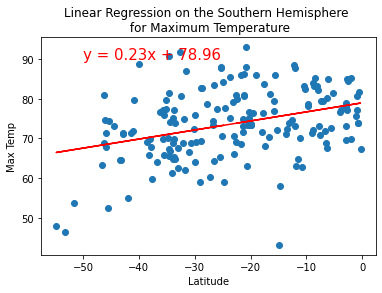

In [112]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Maximum Temperature', 'Max Temp',(-50,90))

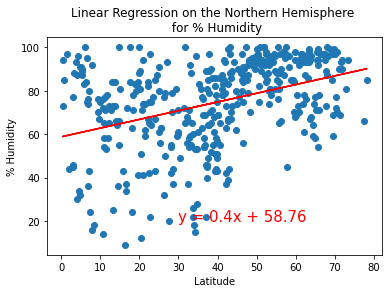

In [113]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for % Humidity', '% Humidity',(30,20))

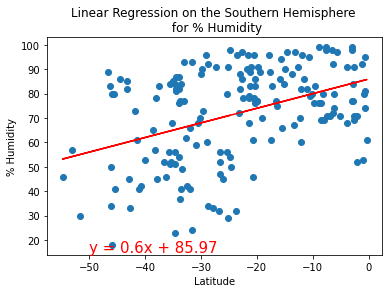

In [114]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Humidity', '% Humidity',(-50,15))

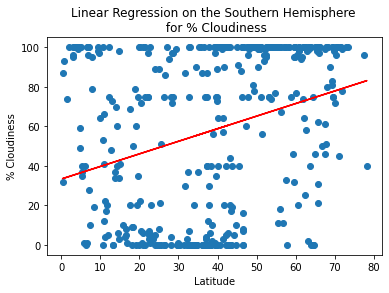

In [115]:
# Linear regression on the Southern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

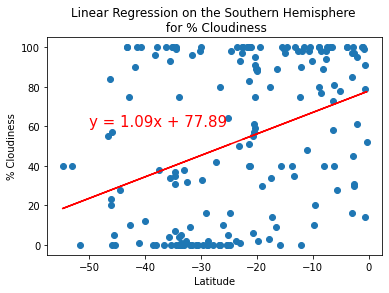

In [116]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for % Cloudiness', '% Cloudiness',(-50,60))

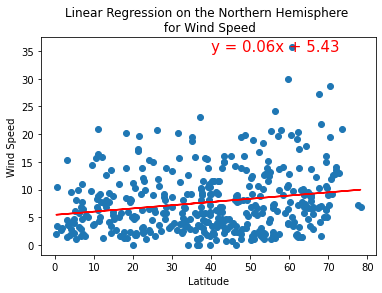

In [117]:
# Linear regression on the Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Northern Hemisphere \n for Wind Speed', 'Wind Speed',(40,35))

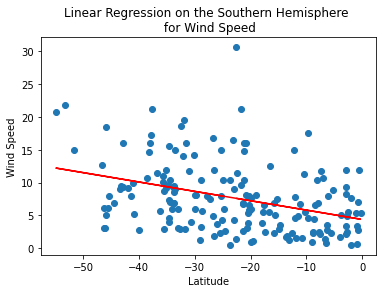

In [118]:
# Linear regression on the Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]
# Call the function.
plot_linear_regression(x_values, y_values,
                       'Linear Regression on the Southern Hemisphere \n for Wind Speed', 'Wind Speed',(-50,35))